# Permuation based Mutual Exclusive and Co-occurrence for group of items

In [1]:
import numpy as np
import pandas as pd
import scipy.sparse as sparse
import random

This is the python implementation of the MutEx algorithm described in the PhD Thesis "Analysis and visualization of multidimensional cancer genomics data" : http://www.tdx.cat/handle/10803/301436

The same algorithm is also implement in Java in the Gitools software: http://www.gitools.org

## Create a random sparse DataFrame reperesenting mutations

In [2]:
row, col = 100, 100
np.random.seed(77)
df = pd.DataFrame(sparse.random(row, col, density=0.15).A).apply(np.ceil)

df= df.astype(int)
df.loc[0] = [1 if x < 20 else 0 for x in range(0, df.shape[1])]
df.loc[1] = [1 if x > 13 and x < 35 else 0 for x in range(0, df.shape[1])]
df.loc[2] = [1 if x > 80 else 0 for x in range(0, df.shape[1])]

df.columns = ['s' + str(x) for x in df.columns]
df.index = ['gene' + str(x) for x in df.index]

pd.set_option('display.max_columns', 1000)
df.head()

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40,s41,s42,s43,s44,s45,s46,s47,s48,s49,s50,s51,s52,s53,s54,s55,s56,s57,s58,s59,s60,s61,s62,s63,s64,s65,s66,s67,s68,s69,s70,s71,s72,s73,s74,s75,s76,s77,s78,s79,s80,s81,s82,s83,s84,s85,s86,s87,s88,s89,s90,s91,s92,s93,s94,s95,s96,s97,s98,s99
gene0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
gene1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
gene2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
gene3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
gene4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0


## We import mutex and create a MutEx instance

The MutEx has to be created with the full data matrix - so it has the correct background event (mutation) rate for both samples and genes

In [3]:
from mutex import MutEx

In [4]:
m = MutEx(background=df, permutations=2000)

### Example run 

In [5]:
%time r = m.calculate(['gene4', 'gene5', 'gene6'], parallel=False)
print(r)



CPU times: user 20.8 ms, sys: 18 ms, total: 38.7 ms
Wall time: 7.32 s
MuTexResult
  Zscore:                     0.9283820792504899
  Mutual Exclusive p-value:   0.268
  Co-occurence p-value:       0.89
  Permutations:               2000
  Sample Coverage:            35
  Signal:                     38


In [6]:
%time r = m.calculate(['gene4', 'gene5'], parallel=False)
print(r)



CPU times: user 16.8 ms, sys: 14.8 ms, total: 31.6 ms
Wall time: 6.8 s
MuTexResult
  Zscore:                     0.7272472733728353
  Mutual Exclusive p-value:   0.406
  Co-occurence p-value:       0.879
  Permutations:               2000
  Sample Coverage:            27
  Signal:                     28


### Example run , multi-threaded

In [7]:
%time r = m.calculate(['gene0', 'gene1', 'gene2'])
print(r)


CPU times: user 109 ms, sys: 88.5 ms, total: 197 ms
Wall time: 3.39 s
MuTexResult
  Zscore:                     2.3202414648708265
  Mutual Exclusive p-value:   0.0115
  Co-occurence p-value:       0.9945
  Permutations:               2000
  Sample Coverage:            54
  Signal:                     60


### Example with many groups

In [8]:
#some random groups and put it in a generator (alternatively list)
random.seed(18)
group_generator = (random.sample( df.index.tolist(), random.sample([2,3,4], 1)[0]) for x in range(10) )

In [9]:
result_list = [m.calculate(g) for g in group_generator]
result_df = pd.DataFrame.from_records([r.__dict__ for r in result_list])
result_df[['items','coverage', 'signal', 'mutex_pvalue', 'co_occurence_pvalue', 'signal_coverage_ratio', 'mean_sim_coverage']].sort_values('mutex_pvalue')


,items,coverage,signal,mutex_pvalue,co_occurence_pvalue,signal_coverage_ratio,mean_sim_coverage
9,"[gene96, gene63, gene27, gene91]",53,61,0.0180,0.9940,0.868852,47.8640
1,"[gene42, gene30, gene25]",41,45,0.1320,0.9460,0.911111,38.5070
2,"[gene80, gene63, gene23]",40,44,0.1610,0.9460,0.909091,37.7385
3,"[gene37, gene58, gene33]",43,48,0.1735,0.8925,0.895833,40.3860
8,"[gene73, gene64, gene25]",48,55,0.1735,0.9460,0.872727,45.1930
6,"[gene97, gene22, gene30, gene21]",50,64,0.5585,0.5910,0.781250,49.8600
0,"[gene15, gene84]",23,24,0.6545,0.7370,0.958333,22.7505
5,"[gene41, gene66]",24,26,0.8380,0.4470,0.923077,24.5335
7,"[gene25, gene94]",26,31,0.9880,0.0535,0.838710,28.6665
4,"[gene32, gene88]",25,31,1.0000,0.0055,0.806452,28.8345


## Big matrix

In [10]:
row, col = 10000, 800
np.random.seed(77)
df = pd.DataFrame(sparse.random(row, col).A).apply(np.ceil)

df.columns = ['s' + str(x) for x in df.columns]
df.index = ['gene' + str(x) for x in df.index]

pd.set_option('display.max_columns', 1000)
df.head()

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40,s41,s42,s43,s44,s45,s46,s47,s48,s49,s50,s51,s52,s53,s54,s55,s56,s57,s58,s59,s60,s61,s62,s63,s64,s65,s66,s67,s68,s69,s70,s71,s72,s73,s74,s75,s76,s77,s78,s79,s80,s81,s82,s83,s84,s85,s86,s87,s88,s89,s90,s91,s92,s93,s94,s95,s96,s97,s98,s99,s100,s101,s102,s103,s104,s105,s106,s107,s108,s109,s110,s111,s112,s113,s114,s115,s116,s117,s118,s119,s120,s121,s122,s123,s124,s125,s126,s127,s128,s129,s130,s131,s132,s133,s134,s135,s136,s137,s138,s139,s140,s141,s142,s143,s144,s145,s146,s147,s148,s149,s150,s151,s152,s153,s154,s155,s156,s157,s158,s159,s160,s161,s162,s163,s164,s165,s166,s167,s168,s169,s170,s171,s172,s173,s174,s175,s176,s177,s178,s179,s180,s181,s182,s183,s184,s185,s186,s187,s188,s189,s190,s191,s192,s193,s194,s195,s196,s197,s198,s199,s200,s201,s202,s203,s204,s205,s206,s207,s208,s209,s210,s211,s212,s213,s214,s215,s216,s217,s218,s219,s220,s221,s222,s223,s224,s225,s226,s227,s228,s229,s230,s231,s232,s233,s234,s235,s236,s237,s238,s239,s240,s241,s242,s243,s244,s245,s246,s247,s248,s249,s250,s251,s252,s253,s254,s255,s256,s257,s258,s259,s260,s261,s262,s263,s264,s265,s266,s267,s268,s269,s270,s271,s272,s273,s274,s275,s276,s277,s278,s279,s280,s281,s282,s283,s284,s285,s286,s287,s288,s289,s290,s291,s292,s293,s294,s295,s296,s297,s298,s299,s300,s301,s302,s303,s304,s305,s306,s307,s308,s309,s310,s311,s312,s313,s314,s315,s316,s317,s318,s319,s320,s321,s322,s323,s324,s325,s326,s327,s328,s329,s330,s331,s332,s333,s334,s335,s336,s337,s338,s339,s340,s341,s342,s343,s344,s345,s346,s347,s348,s349,s350,s351,s352,s353,s354,s355,s356,s357,s358,s359,s360,s361,s362,s363,s364,s365,s366,s367,s368,s369,s370,s371,s372,s373,s374,s375,s376,s377,s378,s379,s380,s381,s382,s383,s384,s385,s386,s387,s388,s389,s390,s391,s392,s393,s394,s395,s396,s397,s398,s399,s400,s401,s402,s403,s404,s405,s406,s407,s408,s409,s410,s411,s412,s413,s414,s415,s416,s417,s418,s419,s420,s421,s422,s423,s424,s425,s426,s427,s428,s429,s430,s431,s432,s433,s434,s435,s436,s437,s438,s439,s440,s441,s442,s443,s444,s445,s446,s447,s448,s449,s450,s451,s452,s453,s454,s455,s456,s457,s458,s459,s460,s461,s462,s463,s464,s465,s466,s467,s468,s469,s470,s471,s472,s473,s474,s475,s476,s477,s478,s479,s480,s481,s482,s483,s484,s485,s486,s487,s488,s489,s490,s491,s492,s493,s494,s495,s496,s497,s498,s499,s500,s501,s502,s503,s504,s505,s506,s507,s508,s509,s510,s511,s512,s513,s514,s515,s516,s517,s518,s519,s520,s521,s522,s523,s524,s525,s526,s527,s528,s529,s530,s531,s532,s533,s534,s535,s536,s537,s538,s539,s540,s541,s542,s543,s544,s545,s546,s547,s548,s549,s550,s551,s552,s553,s554,s555,s556,s557,s558,s559,s560,s561,s562,s563,s564,s565,s566,s567,s568,s569,s570,s571,s572,s573,s574,s575,s576,s577,s578,s579,s580,s581,s582,s583,s584,s585,s586,s587,s588,s589,s590,s591,s592,s593,s594,s595,s596,s597,s598,s599,s600,s601,s602,s603,s604,s605,s606,s607,s608,s609,s610,s611,s612,s613,s614,s615,s616,s617,s618,s619,s620,s621,s622,s623,s624,s625,s626,s627,s628,s629,s630,s631,s632,s633,s634,s635,s636,s637,s638,s639,s640,s641,s642,s643,s644,s645,s646,s647,s648,s649,s650,s651,s652,s653,s654,s655,s656,s657,s658,s659,s660,s661,s662,s663,s664,s665,s666,s667,s668,s669,s670,s671,s672,s673,s674,s675,s676,s677,s678,s679,s680,s681,s682,s683,s684,s685,s686,s687,s688,s689,s690,s691,s692,s693,s694,s695,s696,s697,s698,s699,s700,s701,s702,s703,s704,s705,s706,s707,s708,s709,s710,s711,s712,s713,s714,s715,s716,s717,s718,s719,s720,s721,s722,s723,s724,s725,s726,s727,s728,s729,s730,s731,s732,s733,s734,s735,s736,s737,s738,s739,s740,s741,s742,s743,s744,s745,s746,s747,s748,s749,s750,s751,s752,s753,s754,s755,s756,s757,s758,s759,s760,s761,s762,s763,s764,s765,s766,s767,s768,s769,s770,s771,s772,s773,s774,s775,s776,s777,s778,s779,s780,s781,s782,s783,s784,s785,s786,s787,s788,s789,s790,s791,s792,s793,s794,s795,s796,s797,s798,s799
gene0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [11]:
m = MutEx(df, permutations=10000)

In [12]:
df=df.astype(int)
group = random.sample( df.index.tolist(), 20)
%time r = m.calculate(group)
r

TypeError: 'float' object cannot be interpreted as an integer

MuTexResult
  Zscore:                     2.3202414648708265
  Mutual Exclusive p-value:   0.0115
  Co-occurence p-value:       0.9945
  Permutations:               2000
  Sample Coverage:            54
  Signal:                     60

## Comparing simulation with 'original' data

We compute the mutational burden per sample and do 500 simulations of the mutation matrix

In [14]:
sample_mut_orig = df.apply(sum)

In [79]:
sample_mut_orig.head()

s0     98
s1    104
s2     86
s3     98
s4    118
dtype: float64

In [17]:
from pandas.tools.plotting import parallel_coordinates
import matplotlib.pylab as pylab
%matplotlib inline  


The 500 simulations of the mutation matrix - parallel execution

In [73]:
from functools import partial
import multiprocessing as mp
pool = mp.Pool(processes=mp.cpu_count())
def dosim(m,x):
    np.random.seed(x)
    return m._simulate_observations(df.apply(sum, axis=1)).apply(sum)
partial_simul = partial(dosim)
n = 500
%time simulated_results = pool.starmap(partial_simul.func, zip(itertools.repeat(m,n), range(n)) )
pool.close()  # we are not adding any more processes
pool.join()  # tell it to wait until all threads are done before going on

CPU times: user 5.58 s, sys: 6.73 s, total: 12.3 s
Wall time: 3min 5s


calculate mean and standard deviation of simulated mutational burden for each sample

In [74]:
sim_sample_muts = pd.concat(simulated_results, axis=1).transpose()
sim_sample_muts.columns = df.columns
sim_std = sim_sample_muts.apply(np.std)
sim_mean = sim_sample_muts.apply(np.mean)
sim_sample_muts.head()

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40,s41,s42,s43,s44,s45,s46,s47,s48,s49,s50,s51,s52,s53,s54,s55,s56,s57,s58,s59,s60,s61,s62,s63,s64,s65,s66,s67,s68,s69,s70,s71,s72,s73,s74,s75,s76,s77,s78,s79,s80,s81,s82,s83,s84,s85,s86,s87,s88,s89,s90,s91,s92,s93,s94,s95,s96,s97,s98,s99,s100,s101,s102,s103,s104,s105,s106,s107,s108,s109,s110,s111,s112,s113,s114,s115,s116,s117,s118,s119,s120,s121,s122,s123,s124,s125,s126,s127,s128,s129,s130,s131,s132,s133,s134,s135,s136,s137,s138,s139,s140,s141,s142,s143,s144,s145,s146,s147,s148,s149,s150,s151,s152,s153,s154,s155,s156,s157,s158,s159,s160,s161,s162,s163,s164,s165,s166,s167,s168,s169,s170,s171,s172,s173,s174,s175,s176,s177,s178,s179,s180,s181,s182,s183,s184,s185,s186,s187,s188,s189,s190,s191,s192,s193,s194,s195,s196,s197,s198,s199,s200,s201,s202,s203,s204,s205,s206,s207,s208,s209,s210,s211,s212,s213,s214,s215,s216,s217,s218,s219,s220,s221,s222,s223,s224,s225,s226,s227,s228,s229,s230,s231,s232,s233,s234,s235,s236,s237,s238,s239,s240,s241,s242,s243,s244,s245,s246,s247,s248,s249,s250,s251,s252,s253,s254,s255,s256,s257,s258,s259,s260,s261,s262,s263,s264,s265,s266,s267,s268,s269,s270,s271,s272,s273,s274,s275,s276,s277,s278,s279,s280,s281,s282,s283,s284,s285,s286,s287,s288,s289,s290,s291,s292,s293,s294,s295,s296,s297,s298,s299,s300,s301,s302,s303,s304,s305,s306,s307,s308,s309,s310,s311,s312,s313,s314,s315,s316,s317,s318,s319,s320,s321,s322,s323,s324,s325,s326,s327,s328,s329,s330,s331,s332,s333,s334,s335,s336,s337,s338,s339,s340,s341,s342,s343,s344,s345,s346,s347,s348,s349,s350,s351,s352,s353,s354,s355,s356,s357,s358,s359,s360,s361,s362,s363,s364,s365,s366,s367,s368,s369,s370,s371,s372,s373,s374,s375,s376,s377,s378,s379,s380,s381,s382,s383,s384,s385,s386,s387,s388,s389,s390,s391,s392,s393,s394,s395,s396,s397,s398,s399,s400,s401,s402,s403,s404,s405,s406,s407,s408,s409,s410,s411,s412,s413,s414,s415,s416,s417,s418,s419,s420,s421,s422,s423,s424,s425,s426,s427,s428,s429,s430,s431,s432,s433,s434,s435,s436,s437,s438,s439,s440,s441,s442,s443,s444,s445,s446,s447,s448,s449,s450,s451,s452,s453,s454,s455,s456,s457,s458,s459,s460,s461,s462,s463,s464,s465,s466,s467,s468,s469,s470,s471,s472,s473,s474,s475,s476,s477,s478,s479,s480,s481,s482,s483,s484,s485,s486,s487,s488,s489,s490,s491,s492,s493,s494,s495,s496,s497,s498,s499,s500,s501,s502,s503,s504,s505,s506,s507,s508,s509,s510,s511,s512,s513,s514,s515,s516,s517,s518,s519,s520,s521,s522,s523,s524,s525,s526,s527,s528,s529,s530,s531,s532,s533,s534,s535,s536,s537,s538,s539,s540,s541,s542,s543,s544,s545,s546,s547,s548,s549,s550,s551,s552,s553,s554,s555,s556,s557,s558,s559,s560,s561,s562,s563,s564,s565,s566,s567,s568,s569,s570,s571,s572,s573,s574,s575,s576,s577,s578,s579,s580,s581,s582,s583,s584,s585,s586,s587,s588,s589,s590,s591,s592,s593,s594,s595,s596,s597,s598,s599,s600,s601,s602,s603,s604,s605,s606,s607,s608,s609,s610,s611,s612,s613,s614,s615,s616,s617,s618,s619,s620,s621,s622,s623,s624,s625,s626,s627,s628,s629,s630,s631,s632,s633,s634,s635,s636,s637,s638,s639,s640,s641,s642,s643,s644,s645,s646,s647,s648,s649,s650,s651,s652,s653,s654,s655,s656,s657,s658,s659,s660,s661,s662,s663,s664,s665,s666,s667,s668,s669,s670,s671,s672,s673,s674,s675,s676,s677,s678,s679,s680,s681,s682,s683,s684,s685,s686,s687,s688,s689,s690,s691,s692,s693,s694,s695,s696,s697,s698,s699,s700,s701,s702,s703,s704,s705,s706,s707,s708,s709,s710,s711,s712,s713,s714,s715,s716,s717,s718,s719,s720,s721,s722,s723,s724,s725,s726,s727,s728,s729,s730,s731,s732,s733,s734,s735,s736,s737,s738,s739,s740,s741,s742,s743,s744,s745,s746,s747,s748,s749,s750,s751,s752,s753,s754,s755,s756,s757,s758,s759,s760,s761,s762,s763,s764,s765,s766,s767,s768,s769,s770,s771,s772,s773,s774,s775,s776,s777,s778,s779,s780,s781,s782,s783,s784,s785,s786,s787,s788,s789,s790,s791,s792,s793,s794,s795,s796,s797,s798,s799
0,100,133,74,79,123,97,110,94,78,88,93,102,90,95,99,96,80,99,85,129,134,103,118,115,108,99,108,93,135,122,78,

We plot the simulated mean with the standard deviation as well as the 'original' mutational burden 

We can see that the mean and the original mutational burden are overlapping very well with 500 simulated sets

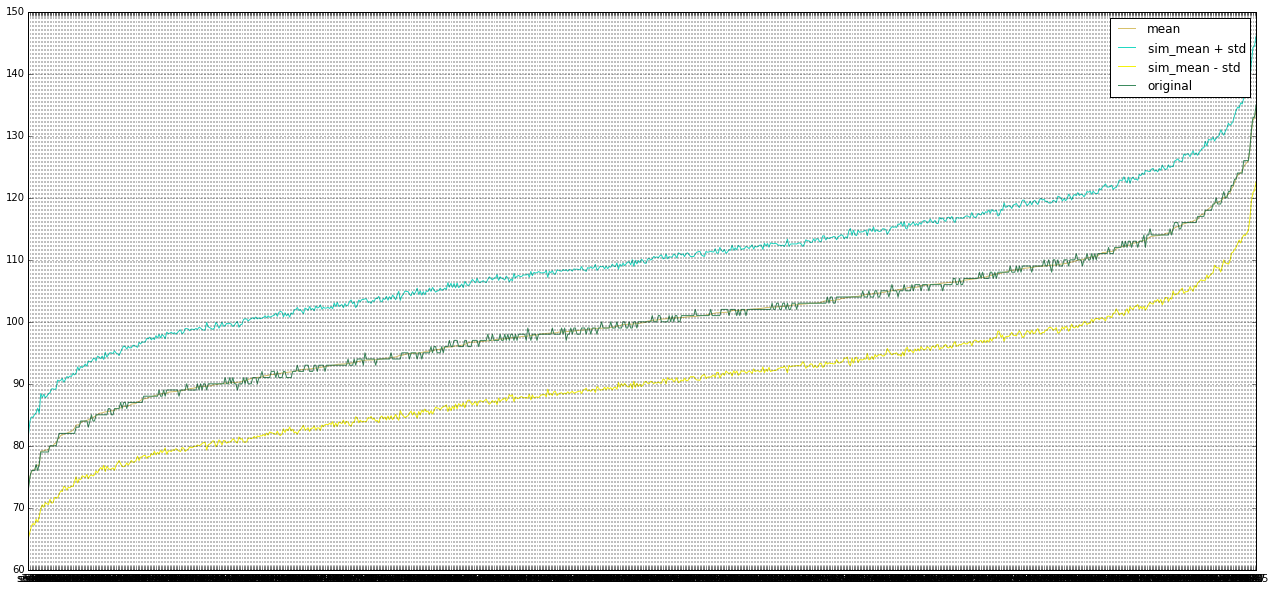

In [78]:
sample_muts_stats = pd.concat([sim_mean, sim_mean + sim_std, sim_mean - sim_std, sample_mut_orig], axis=1).sort_values(0).transpose()
sample_muts_stats.head()
sample_muts_stats['simulated'] = ['mean', 'sim_mean + std', 'sim_mean - std', 'original']
pylab.rcParams['figure.figsize'] = 22, 10

parallel_coordinates(sample_muts_stats, 'simulated', axvlines=False)